# AGRUPADOR E PLOTTER DE GESTOS

## Teste 1 (ACC)

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Função para carregar arquivos da pasta
def load_gesture_files(folder_path):
    all_gestures = []
    file_names = sorted([f for f in os.listdir(folder_path) if f.endswith('.csv')])
    
    for file in file_names:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        df['Gesture'] = file  # Adiciona uma coluna para identificar o gesto
        all_gestures.append(df)
        
    return all_gestures, file_names

# Função para concatenar os gestos
def concatenate_gestures(gestures):
    return pd.concat(gestures, ignore_index=True)

# Função para plotar gráficos com máscaras de cores
def plot_gestures(gestures, file_names):
    plt.figure(figsize=(15, 6))

    color_map = plt.cm.get_cmap('tab20', len(gestures))  # Paleta de cores
    start_idx = 0

    for idx, (gesture_df, file_name) in enumerate(zip(gestures, ['0', '1', '2', '3', '4', '5', '6', '7'])):
        end_idx = start_idx + len(gesture_df)
        
        # Plota as três dimensões do acelerômetro para o gesto
        plt.plot(range(start_idx, end_idx), gesture_df['X'], color='b', label='X' if idx == 0 else "")
        plt.plot(range(start_idx, end_idx), gesture_df['Y'], color='g', label='Y' if idx == 0 else "")
        plt.plot(range(start_idx, end_idx), gesture_df['Z'], color='r', label='Z' if idx == 0 else "")
        
        # Adiciona uma máscara de cor transparente para o gesto
        plt.axvspan(start_idx, end_idx, facecolor=color_map(idx), alpha=0.3, label=file_name)
        
        start_idx = end_idx  # Atualiza o índice de início para o próximo gesto
    
    plt.legend()
    plt.xlabel('Amostra')
    plt.ylabel('Valores dos Sensores')
    plt.title('Gestos')
    plt.show()

# Função principal para carregar, concatenar e plotar os gestos
def main(folder_path):
    gestures, file_names = load_gesture_files(folder_path)
    concatenated_gestures = concatenate_gestures(gestures)
    print(file_names)
    plot_gestures(gestures, file_names)



['0.csv', '1.csv', '2.csv', '3.csv', '4.csv', '5.csv', '6.csv', '7.csv']


/tmp/ipykernel_37024/1345641374.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20', len(gestures))  # Paleta de cores


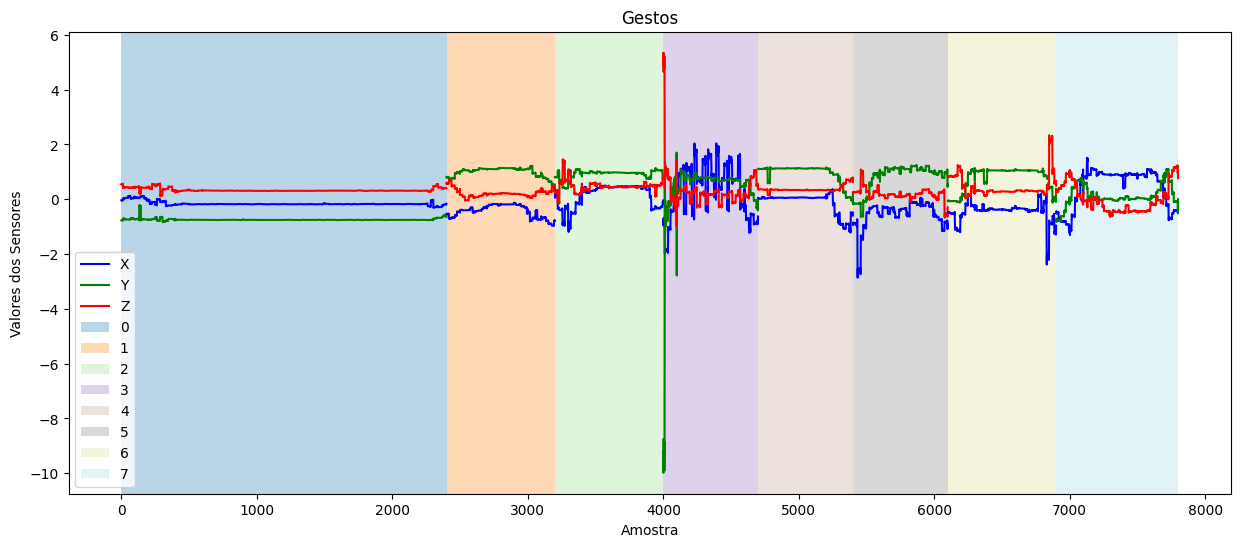

In [16]:
folder_path = '/home/danielgohl/experimentos/scripts/utils/gestos_exemplos'  # Defina o caminho da pasta com os arquivos de gestos
main(folder_path)

## Teste  (ACC + GYR)

In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Função para carregar arquivos da pasta na ordem correta
def load_gesture_files(folder_path):
    # Definindo a ordem das atividades
    activity_order = ['CL', 'IL', 'AC', 'CH', 'AO', 'PF', 'SQ', 'EP']
    
    all_gestures = []
    file_names = sorted([f for f in os.listdir(folder_path) if f.endswith('.csv')])
    
    # Reorganizando os arquivos de acordo com a ordem de atividades
    ordered_files = [f for activity in activity_order for f in file_names if activity in f]
    
    for file in ordered_files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        df['Gesture'] = file  # Adiciona uma coluna para identificar o gesto
        all_gestures.append(df)
        
    return all_gestures, ordered_files

# Função para concatenar os gestos
def concatenate_gestures(gestures):
    return pd.concat(gestures, ignore_index=True)

# Função para plotar gráficos com máscaras de cores
def plot_gestures(gestures, file_names):
    plt.figure(figsize=(12, 10), dpi= 1000)

    color_map = plt.cm.get_cmap('tab20', len(gestures))  # Paleta de cores
    start_idx = 0

    for idx, (gesture_df, file_name) in enumerate(zip(gestures, ['0', '1', '2', '3', '4', '5', '6', '7'])):
        end_idx = start_idx + len(gesture_df)
        
        # Ajuste os nomes das colunas conforme encontrado na verificação
        plt.subplot(2, 1, 1)  # Subplot para dados do acelerômetro
        plt.plot(range(start_idx, end_idx), gesture_df['x'], color='r', label='Acc_X' if idx == 0 else "")
        plt.plot(range(start_idx, end_idx), gesture_df['y'], color='g', label='Acc_Y' if idx == 0 else "")
        plt.plot(range(start_idx, end_idx), gesture_df['z'], color='b', label='Acc_Z' if idx == 0 else "")
        plt.axvspan(start_idx, end_idx, facecolor=color_map(idx), alpha=0.3, label=file_name)  # Mostrar o nome do arquivo (gesto) na legenda
        
        plt.subplot(2, 1, 2)  # Subplot para dados do giroscópio
        plt.plot(range(start_idx, end_idx), gesture_df['gx'], color='r', label='Gyr_X' if idx == 0 else "")
        plt.plot(range(start_idx, end_idx), gesture_df['gy'], color='g', label='Gyr_Y' if idx == 0 else "")
        plt.plot(range(start_idx, end_idx), gesture_df['gz'], color='b', label='Gyr_Z' if idx == 0 else "")
        plt.axvspan(start_idx, end_idx, facecolor=color_map(idx), alpha=0.3, label=file_name)  # Mostrar o nome do arquivo (gesto) na legenda
        
        start_idx = end_idx  # Atualiza o índice de início para o próximo gesto
    
    # Configurações para o primeiro subplot (acelerômetro)
    plt.subplot(2, 1, 1)
    plt.legend(loc='upper right')
    plt.title('Sinal do acelerômetro')
    plt.ylabel('Valores do sensor')

    # Configurações para o segundo subplot (giroscópio)
    plt.subplot(2, 1, 2)
    plt.legend(loc='upper right')
    plt.title('Sinal do giroscópio')
    plt.ylabel('Valores do sensor')

    plt.tight_layout()
    plt.show()

# Função principal para carregar, concatenar e plotar os gestos
def main(folder_path):
    gestures, file_names = load_gesture_files(folder_path)
    concatenated_gestures = concatenate_gestures(gestures)
    plot_gestures(gestures, file_names)



In [21]:
# Exemplo de execução
folder_path = '/home/danielgohl/experimentos/scripts/utils/gestos_exemplos_gyac'  # Defina o caminho da pasta com os arquivos de gestos
main(folder_path)


/tmp/ipykernel_37024/3622849198.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20', len(gestures))  # Paleta de cores
